In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 2021
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [27]:
df = df_jan
df = df[df.trip_type == 2]

In [35]:
df['duration'] = df.lpep_dropoff_datetime-df.lpep_pickup_datetime

/tmp/ipykernel_47963/31850212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df.lpep_dropoff_datetime-df.lpep_pickup_datetime


In [36]:
df.duration = (df['duration'].dt.total_seconds()) / 60

/tmp/ipykernel_47963/58945543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.duration = (df['duration'].dt.total_seconds()) / 60


In [21]:
# df.duration.apply(lambda td: td.total_seconds()/60)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

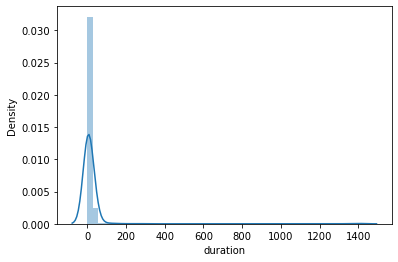

In [37]:
sns.distplot(df.duration)

In [38]:
df.duration.describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [39]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [40]:
((df.duration > 1) & (df.duration <=60)).mean()

0.5169628432956381

In [41]:
((df.duration > 1) & (df.duration <=60))

6        False
15       False
30        True
43       False
45       False
         ...  
40363     True
40364     True
40377    False
40394    False
40430     True
Name: duration, Length: 1238, dtype: bool